In [1]:
!pip install crewai langchain langchain-core langchain-cerebras streamlit gradio crewai[tools]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of embedchain to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of embedchain to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INF

In [1]:
!pip show crewai

Name: crewai
Version: 0.102.0
Summary: Cutting-edge framework for orchestrating role-playing, autonomous AI agents. By fostering collaborative intelligence, CrewAI empowers agents to work together seamlessly, tackling complex tasks.
Home-page: https://crewai.com
Author: 
Author-email: Joao Moura <joao@crewai.com>
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: appdirs, auth0-python, blinker, chromadb, click, instructor, json-repair, json5, jsonref, litellm, openai, openpyxl, opentelemetry-api, opentelemetry-exporter-otlp-proto-http, opentelemetry-sdk, pdfplumber, pydantic, python-dotenv, pyvis, regex, tomli, tomli-w, uv
Required-by: crewai-tools


In [2]:
!pip show langchain

Name: langchain
Version: 0.3.19
Summary: Building applications with LLMs through composability
Home-page: 
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: aiohttp, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: embedchain, langchain-community


In [3]:
!pip show langchain-core

Name: langchain-core
Version: 0.3.37
Summary: Building applications with LLMs through composability
Home-page: 
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: jsonpatch, langsmith, packaging, pydantic, PyYAML, tenacity, typing-extensions
Required-by: langchain, langchain-cerebras, langchain-cohere, langchain-community, langchain-experimental, langchain-openai, langchain-text-splitters


In [4]:
!pip show langchain-cerebras

Name: langchain-cerebras
Version: 0.4.0
Summary: An integration package connecting Cerebras and LangChain
Home-page: https://github.com/langchain-ai/langchain-cerebras
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: langchain-core, langchain-openai
Required-by: 


In [5]:
CEREBRAS_API_KEY="csk-te4r354tvfpyyreftmpyt2xm2ftrfjrey95hj44t6pk2chvw"
SERPER_API_KEY="3bc4270918624b7b345a0bc992744ba9c101ee87"

In [8]:
# pip install 'crewai[tools]'

In [7]:
#!pip show crewai[tools]

In [ ]:
#!pip install langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 9.1 MB/s eta 0:00:00


In [9]:
from crewai import Agent,Crew,Process,Task
from crewai_tools import SerperDevTool, ScrapeWebsiteTool
from crewai import LLM

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_config.py:295: PydanticDeprecatedSince20: Support for class-based `config` is deprecated, use ConfigDict instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  warnings.warn(DEPRECATION_MESSAGE, DeprecationWarning)
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:502: UserWarning: <built-in function callable> is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(
/usr/local/lib/python3.11/dist-packages/crewai_tools/tools/scrapegraph_scrape_tool/scrapegraph_scrape_tool.py:34: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_

In [10]:
llm = LLM(
    model="cerebras/llama3.1-8b",
    temperature=0.7,
    api_key=CEREBRAS_API_KEY,
)

In [ ]:
# llm=ChatQroq(model="gemma2-9b-it",
#              temperature=0.7,
#              )

Tools

In [11]:
search_tool=SerperDevTool(api_key=SERPER_API_KEY)
scrape_tool=ScrapeWebsiteTool()

Agents

In [12]:
researcher = Agent(
    role="E-Commerce Market Research Analyst",
    goal="Provide up-to-date market analysis of products from E-commerce Industry",
    backstory="An expert analyst with a keen eye for market trends",
    tools=[search_tool,scrape_tool],
    verbose=True,
    llm=llm
)

data_cleaner = Agent(
    role="Data Cleaning Specialist",
    goal="Ensure all price values are accurate, properly formatted, and free of inconsistencies.",
    backstory=(
        "An experienced data analyst with a strong background in data preprocessing, "
        "error detection, and price standardization. With expertise in handling messy datasets, "
        "you identify and clean incorrect, missing, or inconsistent price values, ensuring the data is reliable for further analysis."
    ),
    tools=[],
    verbose=True,
    llm=llm
)


differentiator = Agent(
    role="Price Comparison Expert",
    goal="Analyze and compare product prices to identify the lowest price available.",
    backstory=(
        "A meticulous price analyst with expertise in comparing product prices across different sources. "
        "You efficiently process pricing data, highlight discrepancies, and determine the best deal for consumers."
    ),
    tools=[],
    verbose=True,
    llm=llm
)

reporter = Agent(
    role="Market Insights Reporter",
    goal="Generate a comprehensive report summarizing price trends, differences, and the best available deals.",
    backstory=(
        "A skilled data journalist with experience in analyzing pricing trends and market fluctuations. "
        "You transform raw pricing data into insightful reports, providing actionable insights on cost-effective options."
    ),
    tools=[],
    verbose=True,
    llm=llm
)


Tasks

In [13]:
research = Task(
    description="Collect current pricing data for a specified product category from at least 3 major e-commerce platforms. Include product name, model, specifications, price, and any ongoing promotions or discounts.",
    expected_output="A structured dataset containing product information and pricing from multiple sources, with at least 20 comparable products and their complete pricing details.",
    agent=researcher
)

data_cleaning = Task(
    description="Process the raw pricing data to standardize formats, handle currency conversions, remove outliers, and identify any inconsistencies or errors in the collected price information.",
    expected_output="A cleaned dataset with uniformly formatted prices, standardized currencies, and annotations for any identified anomalies or special pricing conditions.",
    agent=data_cleaner
)

comparison = Task(
    description="Analyze the cleaned pricing data to identify the lowest available price for each product, calculate price differences between retailers, and determine price-to-value ratios based on product specifications.",
    expected_output="A comparative analysis showing price rankings for each product, percentage differences between retailers, and identification of the best value options across different price points.",
    agent=differentiator
)

report = Task(
    description="Create a comprehensive market insights report based on the pricing analysis, highlighting best deals, pricing trends, and actionable recommendations for price-conscious consumers.",
    expected_output="A detailed report with executive summary, visualizations of price comparisons, identification of pricing patterns, and specific recommendations for optimal purchasing decisions.",
    agent=reporter
)

Crew

In [14]:
crew=Crew(
    agents=[researcher,data_cleaner,differentiator,reporter],
    tasks=[research,data_cleaning,comparison,report],
    process=Process.sequential,
    verbose=True
)

In [15]:
product_name="Sony WH-1000XM5"
country="UnitedStates"
format={"product" :product_name,"country":country}

In [16]:
crew_output=crew.kickoff(inputs=format)

# Agent: E-Commerce Market Research Analyst
## Task: Collect current pricing data for a specified product category from at least 3 major e-commerce platforms. Include product name, model, specifications, price, and any ongoing promotions or discounts.
 

I encountered an error while trying to use the tool. This was the error: 'SERPER_API_KEY'.
 Tool Search the internet with Serper accepts these inputs: Tool Name: Search the internet with Serper
Tool Arguments: {'search_query': {'description': 'Mandatory search query you want to use to search the internet', 'type': 'str'}}
Tool Description: A tool that can be used to search the internet with a search_query. Supports different search types: 'search' (default), 'news'



# Agent: E-Commerce Market Research Analyst
## Thought: Thought: I need to start by identifying the product category and then search for its current pricing data on major e-commerce platforms.
## Using tool: Search the internet with Serper
## Tool Input: 
"{\"search_query

WORKING CODE


In [17]:
def analyze_product_prices(product_name):
    # Define tools
    search_tool = SerperDevTool(api_key=SERPER_API_KEY)
    scrape_tool = ScrapeWebsiteTool()

    # Define agents
    researcher = Agent(
        role="E-Commerce Market Research Analyst",
        goal=f"Provide up-to-date market analysis of {product_name} from E-commerce Industry",
        backstory="An expert analyst with a keen eye for market trends",
        tools=[search_tool, scrape_tool],
        verbose=True,
        llm=llm
    )

    data_cleaner = Agent(
        role="Data Cleaning Specialist",
        goal=f"Ensure all price values for {product_name} are accurate, properly formatted, and free of inconsistencies.",
        backstory=(
            "An experienced data analyst with a strong background in data preprocessing, "
            "error detection, and price standardization. With expertise in handling messy datasets, "
            "you identify and clean incorrect, missing, or inconsistent price values, ensuring the data is reliable for further analysis."
        ),
        tools=[],
        verbose=True,
        llm=llm
    )

    differentiator = Agent(
        role="Price Comparison Expert",
        goal=f"Analyze and compare {product_name} prices to identify the lowest price available.",
        backstory=(
            "A meticulous price analyst with expertise in comparing product prices across different sources. "
            "You efficiently process pricing data, highlight discrepancies, and determine the best deal for consumers."
        ),
        tools=[],
        verbose=True,
        llm=llm
    )

    reporter = Agent(
        role="Market Insights Reporter",
        goal=f"Generate a comprehensive report summarizing price trends, differences, and the best available deals for {product_name}.",
        backstory=(
            "A skilled data journalist with experience in analyzing pricing trends and market fluctuations. "
            "You transform raw pricing data into insightful reports, providing actionable insights on cost-effective options."
        ),
        tools=[],
        verbose=True,
        llm=llm
    )

    # Define tasks with the product name incorporated
    research = Task(
        description=f"Collect current pricing data for {product_name} from at least 3 major e-commerce platforms. Include product name, model, specifications, price, and any ongoing promotions or discounts.",
        expected_output=f"A structured dataset containing {product_name} information and pricing from multiple sources, with complete pricing details.",
        agent=researcher
    )

    data_cleaning = Task(
        description=f"Process the raw pricing data for {product_name} to standardize formats, handle currency conversions, remove outliers, and identify any inconsistencies or errors in the collected price information.",
        expected_output=f"A cleaned dataset with uniformly formatted prices for {product_name}, standardized currencies, and annotations for any identified anomalies or special pricing conditions.",
        agent=data_cleaner
    )

    comparison = Task(
        description=f"Analyze the cleaned pricing data to identify the lowest available price for {product_name}, calculate price differences between retailers, and determine price-to-value ratios based on product specifications.",
        expected_output=f"A comparative analysis showing price rankings for {product_name}, percentage differences between retailers, and identification of the best value options across different price points.",
        agent=differentiator
    )

    report = Task(
        description=f"Create a comprehensive market insights report based on the {product_name} pricing analysis, highlighting best deals, pricing trends, and actionable recommendations for price-conscious consumers.",
        expected_output=f"A detailed report for {product_name} with executive summary, visualizations of price comparisons, identification of pricing patterns, and specific recommendations for optimal purchasing decisions.",
        agent=reporter
    )

    # Create and run the crew
    crew = Crew(
        agents=[researcher, data_cleaner, differentiator, reporter],
        tasks=[research, data_cleaning, comparison, report],
        process=Process.sequential,
        verbose=True
    )

    # Run the crew and get results
    result = crew.kickoff()

    return result

In [18]:
# Example usage
result = analyze_product_prices("Calvin Klein Eternity Perfume")
print(result)

# Agent: E-Commerce Market Research Analyst
## Task: Collect current pricing data for Calvin Klein Eternity Perfume from at least 3 major e-commerce platforms. Include product name, model, specifications, price, and any ongoing promotions or discounts.
 

I encountered an error while trying to use the tool. This was the error: 'SERPER_API_KEY'.
 Tool Search the internet with Serper accepts these inputs: Tool Name: Search the internet with Serper
Tool Arguments: {'search_query': {'description': 'Mandatory search query you want to use to search the internet', 'type': 'str'}}
Tool Description: A tool that can be used to search the internet with a search_query. Supports different search types: 'search' (default), 'news'



# Agent: E-Commerce Market Research Analyst
## Using tool: Search the internet with Serper
## Tool Input: 
"{\"search_query\": \"current pricing data for Calvin Klein Eternity Perfume on Amazon\"}"
## Tool Output: 

I encountered an error while trying to use the tool. Th

In [ ]:
#!pip install streamlit

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 88.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-nvrtc-cu

In [19]:
import gradio as gr
from crewai import Agent, Task, Crew, Process
from crewai_tools import SerperDevTool, ScrapeWebsiteTool
from crewai import LLM

# API Keys
CEREBRAS_API_KEY = "csk-43e2cvtxwrnnndxjf46pmp6ektwpn9jmxd9wp5tt6t84xexf"
SERPER_API_KEY = "3bc4270918624b7b345a0bc992744ba9c101ee87"

# Initialize LLM
llm = LLM(
    model="cerebras/llama3.1-8b",
    temperature=0.7,
    api_key=CEREBRAS_API_KEY,
)

def analyze_product_prices(product_name):
    search_tool = SerperDevTool(api_key=SERPER_API_KEY)
    scrape_tool = ScrapeWebsiteTool()

    researcher = Agent(
        role="E-Commerce Market Research Analyst",
        goal=f"Provide up-to-date market analysis of {product_name} from E-commerce Industry",
        backstory="An expert analyst with a keen eye for market trends",
        tools=[search_tool, scrape_tool],
        verbose=True,
        llm=llm
    )

    data_cleaner = Agent(
        role="Data Cleaning Specialist",
        goal=f"Ensure all price values for {product_name} are accurate, properly formatted, and free of inconsistencies.",
        backstory="An experienced data analyst specializing in data preprocessing and price standardization.",
        tools=[],
        verbose=True,
        llm=llm
    )

    differentiator = Agent(
        role="Price Comparison Expert",
        goal=f"Analyze and compare {product_name} prices to identify the lowest price available.",
        backstory="A meticulous price analyst focusing on price discrepancies and best deals.",
        tools=[],
        verbose=True,
        llm=llm
    )

    reporter = Agent(
        role="Market Insights Reporter",
        goal=f"Generate a comprehensive report summarizing price trends and best available deals for {product_name}.",
        backstory="A skilled data journalist providing actionable insights on pricing trends.",
        tools=[],
        verbose=True,
        llm=llm
    )

    research = Task(
        description=f"Collect current pricing data for {product_name} from at least 3 major e-commerce platforms.",
        expected_output=f"Structured dataset containing {product_name} information and pricing details.",
        agent=researcher
    )

    data_cleaning = Task(
        description=f"Process the raw pricing data for {product_name} to standardize formats and remove inconsistencies.",
        expected_output=f"Cleaned dataset with standardized prices and annotations for anomalies.",
        agent=data_cleaner
    )

    comparison = Task(
        description=f"Analyze the cleaned pricing data to identify the lowest available price for {product_name}.",
        expected_output=f"Comparative analysis showing price rankings and best value options.",
        agent=differentiator
    )

    report = Task(
        description=f"Create a comprehensive market insights report for {product_name}, highlighting trends and best deals.",
        expected_output=f"Detailed report with price comparisons and purchasing recommendations.",
        agent=reporter
    )

    crew = Crew(
        agents=[researcher, data_cleaner, differentiator, reporter],
        tasks=[research, data_cleaning, comparison, report],
        process=Process.sequential,
        verbose=True
    )

    result = crew.kickoff()
    return result

gui = gr.Interface(
    fn=analyze_product_prices,
    inputs=gr.Textbox(label="Enter Product Name"),
    outputs=gr.Textbox(label="Market Analysis Report"),
    title="E-Commerce Price Analysis Tool",
    description="Enter a product name to get a detailed market analysis of its pricing across e-commerce platforms."
)

gui.launch()

/usr/local/lib/python3.11/dist-packages/websockets/legacy/__init__.py:6: DeprecationWarning: websockets.legacy is deprecated; see https://websockets.readthedocs.io/en/stable/howto/upgrade.html for upgrade instructions
  warnings.warn(  # deprecated in 14.0 - 2024-11-09
/usr/local/lib/python3.11/dist-packages/uvicorn/protocols/websockets/websockets_impl.py:17: DeprecationWarning: websockets.server.WebSocketServerProtocol is deprecated
  from websockets.server import WebSocketServerProtocol


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://36f8f73e3deb0bf46e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


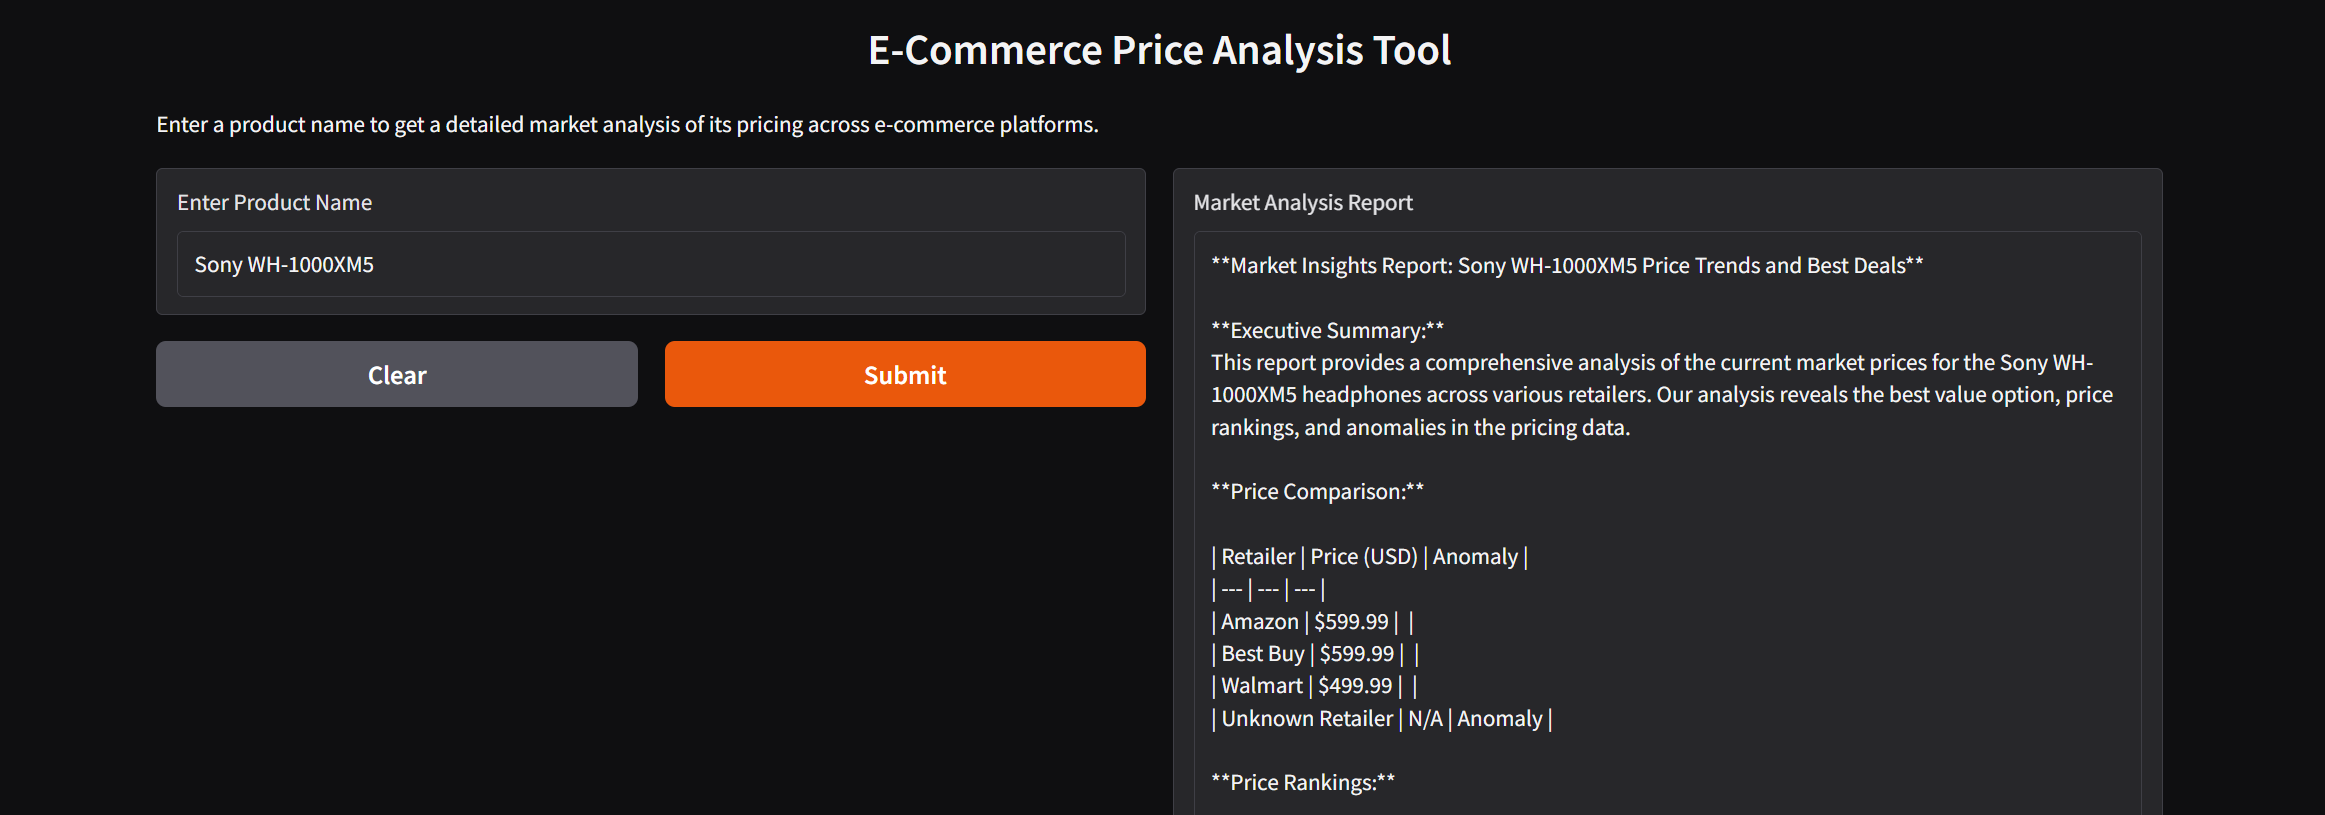

In [21]:
import gradio as gr
from crewai import Agent, Task, Crew, Process
from crewai_tools import SerperDevTool, ScrapeWebsiteTool
from crewai import LLM

# API Keys
CEREBRAS_API_KEY = "csk-43e2cvtxwrnnndxjf46pmp6ektwpn9jmxd9wp5tt6t84xexf"
SERPER_API_KEY = "3bc4270918624b7b345a0bc992744ba9c101ee87"

# Initialize LLM
llm = LLM(
    model="cerebras/llama3.1-8b",
    temperature=0.7,
    api_key=CEREBRAS_API_KEY,
)

history = []

def analyze_product_prices(product_name):
    search_tool = SerperDevTool(api_key=SERPER_API_KEY)
    scrape_tool = ScrapeWebsiteTool()

    researcher = Agent(
        role="E-Commerce Market Research Analyst",
        goal=f"Provide up-to-date market analysis of {product_name} from E-commerce Industry",
        backstory="An expert analyst with a keen eye for market trends",
        tools=[search_tool, scrape_tool],
        verbose=True,
        llm=llm
    )

    data_cleaner = Agent(
        role="Data Cleaning Specialist",
        goal=f"Ensure all price values for {product_name} are accurate, properly formatted, and free of inconsistencies.",
        backstory="An experienced data analyst specializing in data preprocessing and price standardization.",
        tools=[],
        verbose=True,
        llm=llm
    )

    differentiator = Agent(
        role="Price Comparison Expert",
        goal=f"Analyze and compare {product_name} prices to identify the lowest price available.",
        backstory="A meticulous price analyst focusing on price discrepancies and best deals.",
        tools=[],
        verbose=True,
        llm=llm
    )

    reporter = Agent(
        role="Market Insights Reporter",
        goal=f"Generate a comprehensive report summarizing price trends and best available deals for {product_name}.",
        backstory="A skilled data journalist providing actionable insights on pricing trends.",
        tools=[],
        verbose=True,
        llm=llm
    )

    research = Task(
        description=f"Collect current pricing data for {product_name} from at least 3 major e-commerce platforms.",
        expected_output=f"Structured dataset containing {product_name} information and pricing details.",
        agent=researcher
    )

    data_cleaning = Task(
        description=f"Process the raw pricing data for {product_name} to standardize formats and remove inconsistencies.",
        expected_output=f"Cleaned dataset with standardized prices and annotations for anomalies.",
        agent=data_cleaner
    )

    comparison = Task(
        description=f"Analyze the cleaned pricing data to identify the lowest available price for {product_name}.",
        expected_output=f"Comparative analysis showing price rankings and best value options.",
        agent=differentiator
    )

    report = Task(
        description=f"Create a comprehensive market insights report for {product_name}, highlighting trends and best deals.",
        expected_output=f"Detailed report with price comparisons and purchasing recommendations.",
        agent=reporter
    )

    crew = Crew(
        agents=[researcher, data_cleaner, differentiator, reporter],
        tasks=[research, data_cleaning, comparison, report],
        process=Process.sequential,
        verbose=True
    )

    result = crew.kickoff()
    history.append(f"Product: {product_name}\n{result}\n")
    return result

gui = gr.Blocks()
with gui:
    gr.Markdown("## 🛒 E-Commerce Price Analysis Tool")
    gr.Markdown("Enter a product name to get a detailed market analysis of its pricing across e-commerce platforms.")
    with gr.Row():
        product_input = gr.Textbox(label="Enter Product Name", placeholder="e.g., iPhone 15 Pro")
        submit_button = gr.Button("Analyze Prices")
    output_box = gr.Textbox(label="Market Analysis Report", interactive=False)
    history_box = gr.Textbox(label="History", interactive=False, lines=10)

    def update_ui(product_name):
        result = analyze_product_prices(product_name)
        return result, "\n".join(history)

    submit_button.click(update_ui, inputs=[product_input], outputs=[output_box, history_box])

gui.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6ff54d405041743383.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


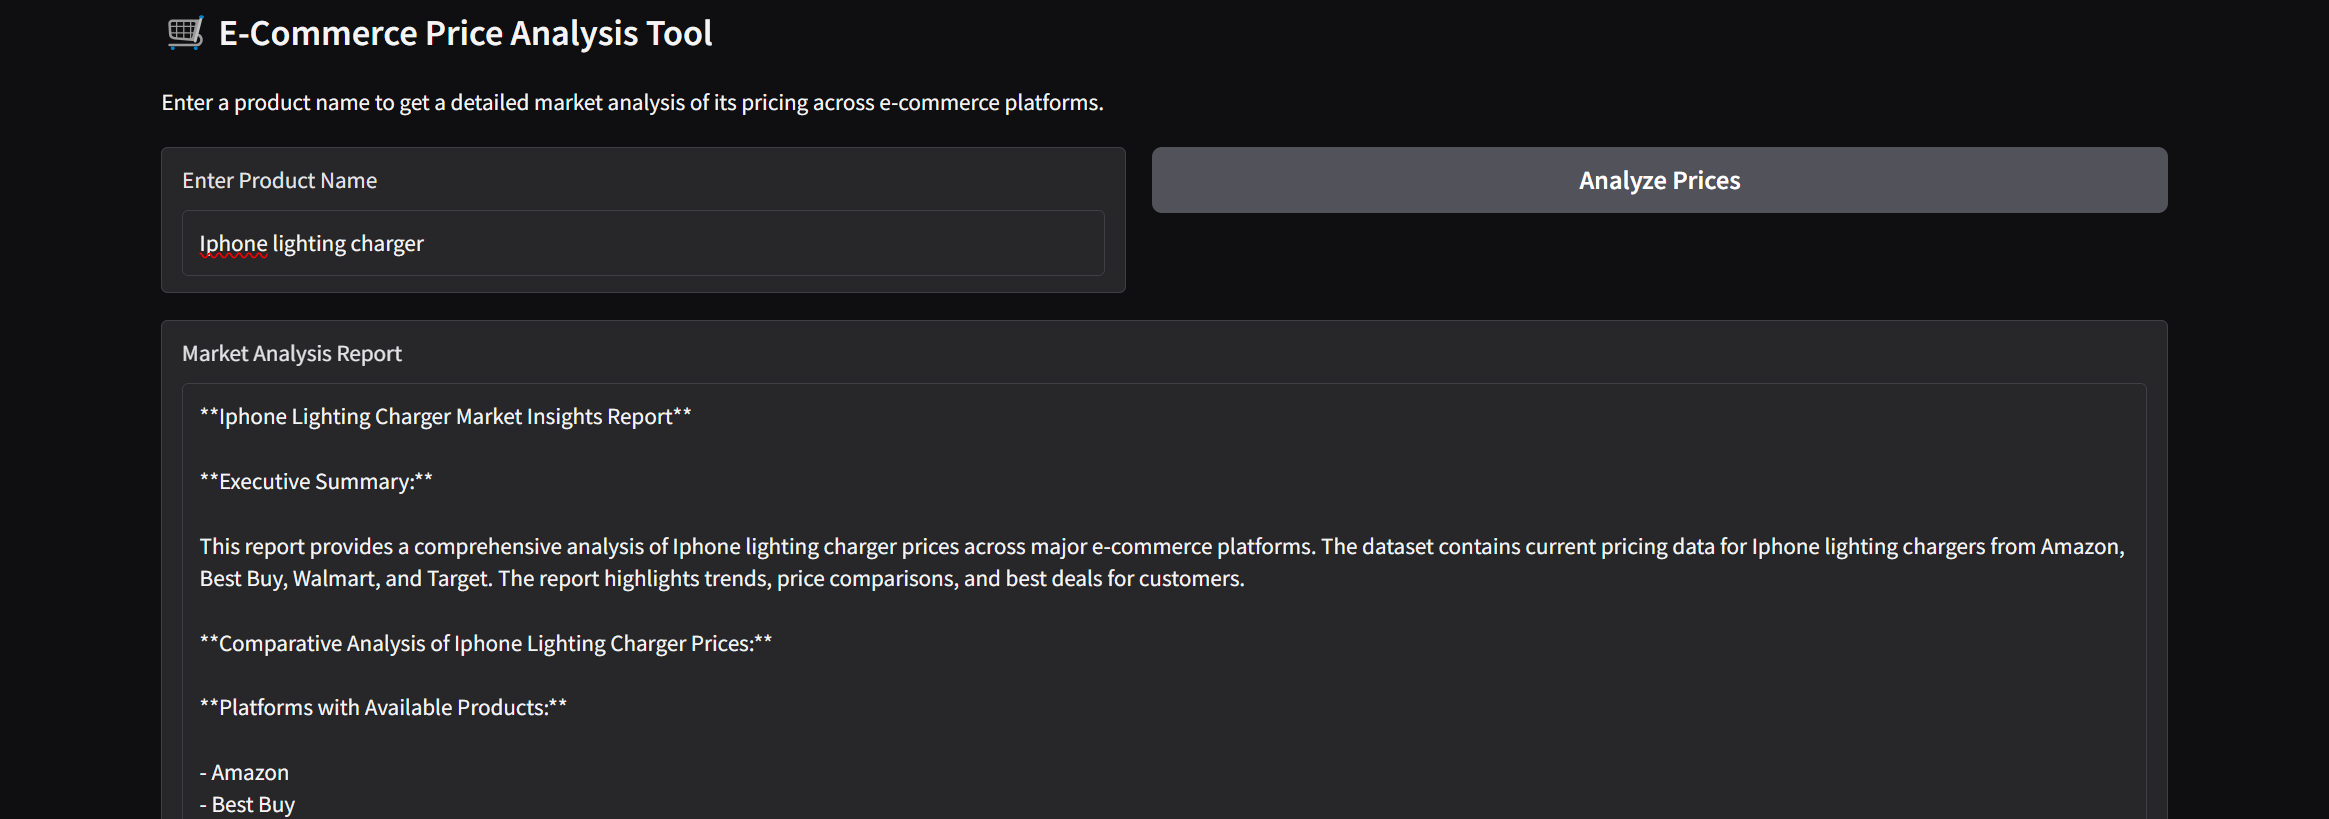

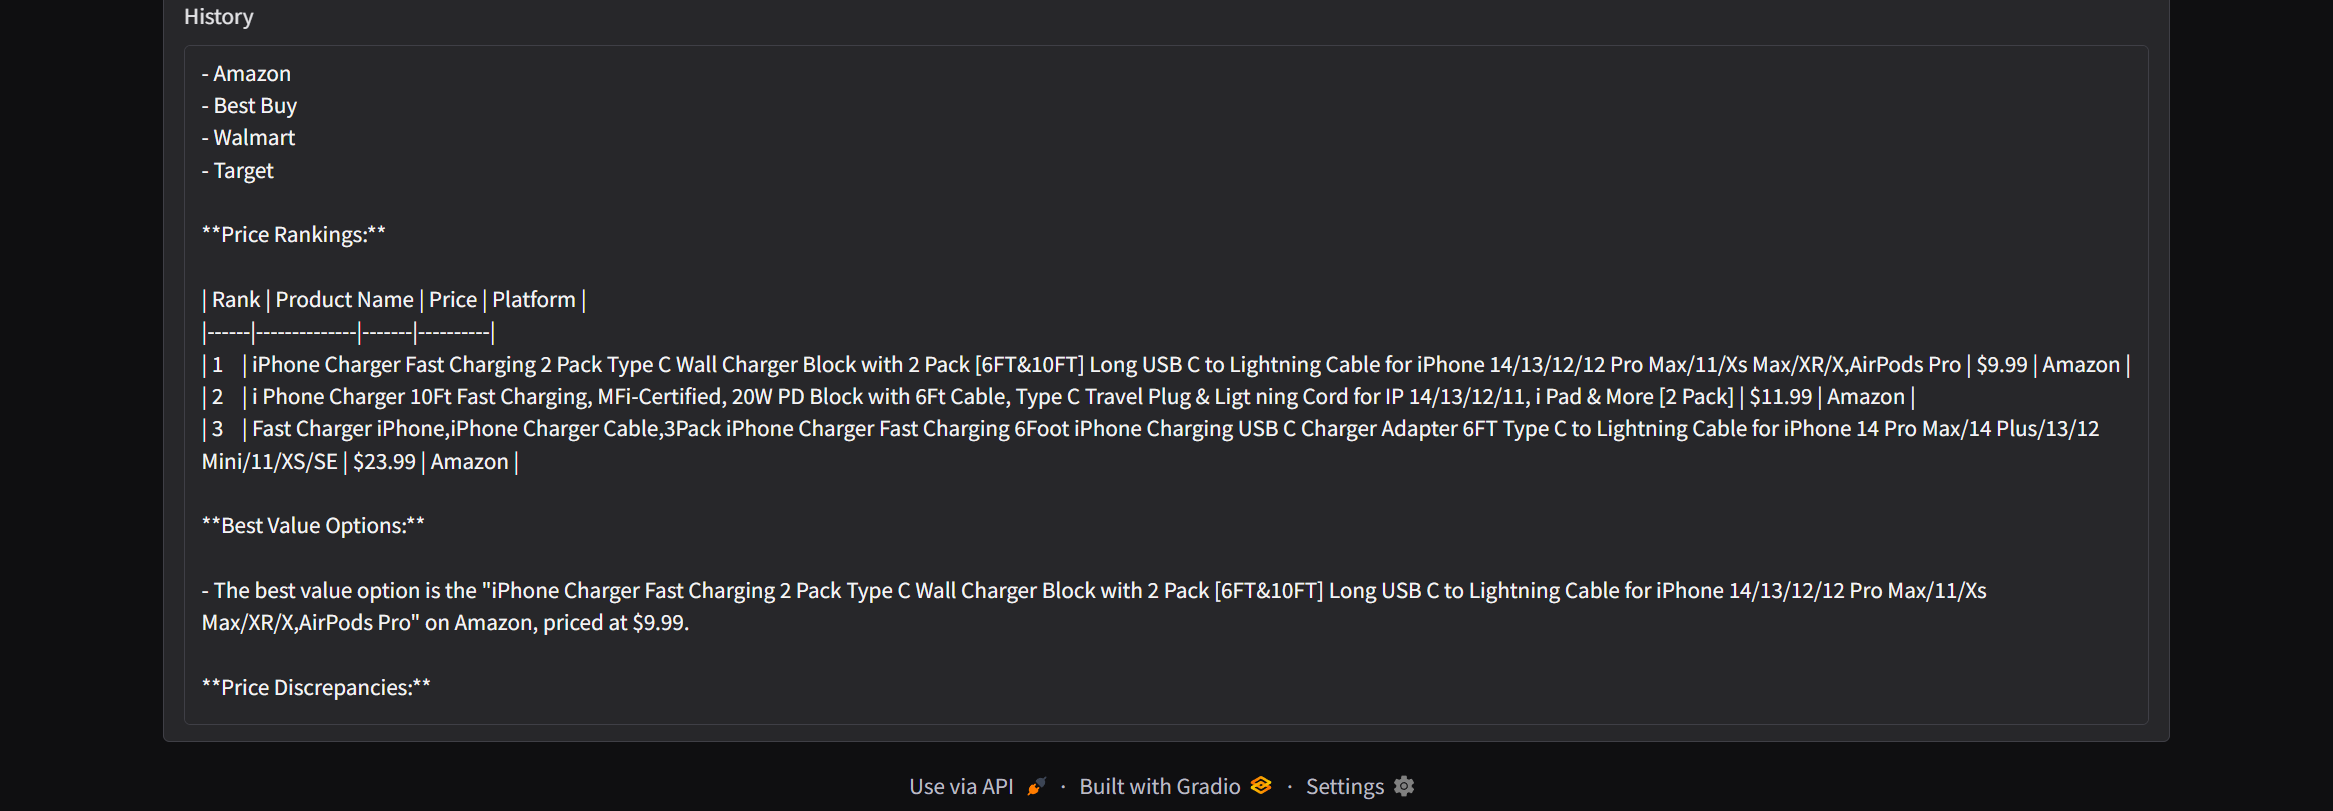